# Assignment Day-11
Written by: Awais Haleem\
Date: 12-10-2023\
Email: awaishaleem20@gmail.com

***Task-1***: How many infant, kid, teen, adult and old age were survived in titanic.

Categories according to age:
- **Infant**:   Birth to 1 year old
- **Kid**:      1 to 5 years old
- **Child**:    5 to 12 years old
- **Teen**:     12 to 20 years old
- **Adult**:    20 to 64 years old
- **Old age**:  65 years to 100 years old

In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load titanic dataset from seaborn
df = sns.load_dataset('titanic')    # load_dataset function offers datasets for practice
df.head()       # see first five entries to get intution of data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# see rows and columns of dataset
df.shape

(891, 15)

In [5]:
# column names 
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [6]:
# data types , entries and null values -> complete information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


***Observation:***
- 15 columns and 891 entries
- 2 bool, 4 categorical, 2 float, 4 int and 5 objet type columns
- missing values in some columns
- data memory is 80.7+ kb


***Approach:***\
There is no column having categories of infant to old age but we can do feature engineering on age column and will make new categorical column.

In [7]:
# let's explore missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

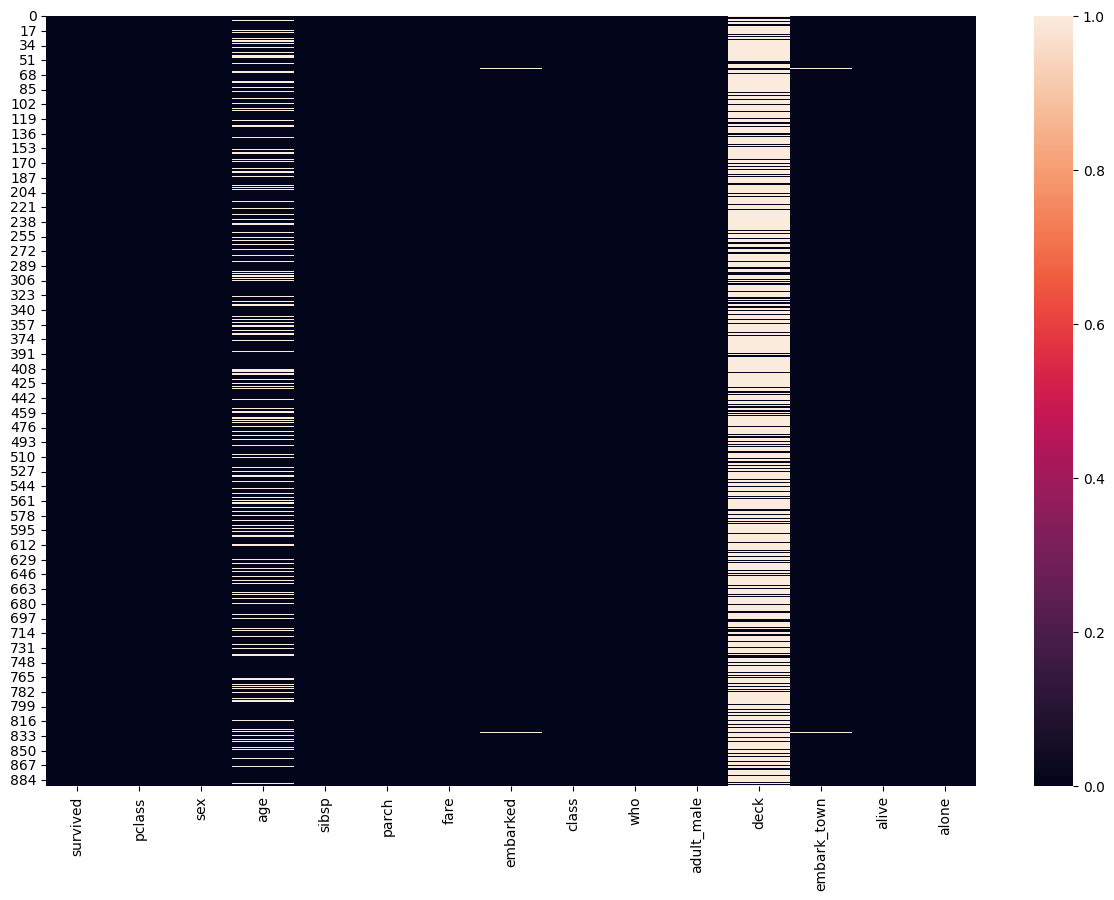

In [8]:
# plot the missing values
plt.figure(figsize=(15, 10))        # set figure size
sns.heatmap(df.isnull())            # heat map of values
plt.show()      # show plot only

In [9]:
# percentage missing values in every column
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

***Observations:***
- embark and embark_town have 2 and 2 missing values
- deck has 77% missing values
- age has almost 20 percent of missing values

***Approach:***
- embark and embark_town's dype is oject, so best way to fill missing values in these columns is mode imputation
- Deck has too many missing values, we will drop it
- Age is a numerical columns, so we fill missing values of age with median

In [10]:
# imput missing values of embark and embark_town with median
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

In [11]:
# missing values of embarked
df['embarked'].isnull().sum()

0

In [12]:
# missing values of embark_town
df['embark_town'].isnull().sum()

0

missing values of embark and embark_tow are imputed successfully.\
now we will handle deck column

In [13]:
# drop deck column
df.drop('deck', axis=1, inplace=True)
df.columns  # see columns to verify deck is no more

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [14]:
# impute missing values of age with median
df['age'].fillna(df['age'].median(), inplace=True)

In [15]:
# verify imputation
df['age'].isnull().sum()

0

There is no more null values in our data set. Now we will create a column with infants -- old age category.\
Pandas **cut** function bins values into discrete intervals.\
Use **cut** when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable.

In [16]:
# declare bins and lables of categories
bins = [0, 1, 5, 12, 20, 64, 100]
labels = ['infant', 'kid', 'child', 'teen', 'adult', 'old_age']

In [17]:
# binning age data with bins and lables, and assigning it to age_groups
df['age_groups'] = pd.cut(df['age'], bins=bins, labels=labels)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_groups
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,adult


In [18]:
# dtype and categories of age_groups
df['age_groups'].dtypes

CategoricalDtype(categories=['infant', 'kid', 'child', 'teen', 'adult', 'old_age'], ordered=True, categories_dtype=object)

In [31]:
# total pessangers survived
total_survied = len(df[df['survived'] == 1])
total_survied

342

In [33]:
# total passenagers died
total_died = len(df[df['survived'] == 0])
total_died

549

In [34]:
# died + survived = total df
len(df) == total_died + total_survied

True

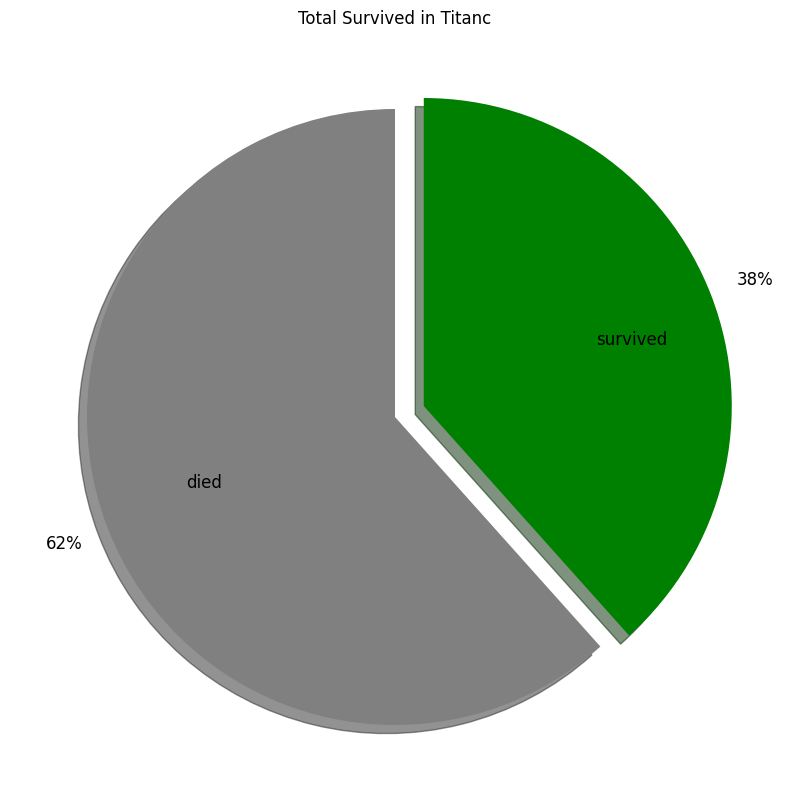

In [73]:
# visualize surviveda and died
data = [total_died, total_survied]
labels = ['died', 'survived']
    

fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(data, labels=labels, autopct= '%.0f%%', colors=['grey', 'green'],
       pctdistance=1.15, labeldistance=.6, explode=(0, 0.1), shadow=True, startangle=90,
       textprops={'size': 'large'})
plt.title("Total Survived in Titanc")
plt.show()

In [60]:
df['age_groups'].unique()

['adult', 'kid', 'teen', 'child', 'old_age', 'infant']
Categories (6, object): ['infant' < 'kid' < 'child' < 'teen' < 'adult' < 'old_age']

In [82]:
# category wise sruvived survived
survived_age_group = df[df['survived'] == 1]['age_groups'].value_counts()
survived_age_group

age_groups
adult      259
teen        42
kid         19
infant      12
child        9
old_age      1
Name: count, dtype: int64

In [84]:
died_age_group = df[df['survived'] == 0]['age_groups'].value_counts()
died_age_group

age_groups
adult      442
teen        68
child       16
kid         11
old_age     10
infant       2
Name: count, dtype: int64

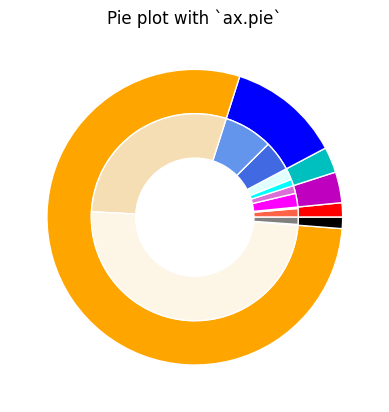

In [95]:
fig, ax = plt.subplots()

outer_data = [
    survived_age_group['infant']+ died_age_group['infant'], 
    survived_age_group['kid']+ died_age_group['kid'],   
    survived_age_group['child']+ died_age_group['child'],   
    survived_age_group['teen']+ died_age_group['teen'],  
    survived_age_group['adult']+ died_age_group['adult'],   
    survived_age_group['old_age']+ died_age_group['old_age']
        ]

inner_data = [survived_age_group['infant'], died_age_group['infant'], 
    survived_age_group['kid'], died_age_group['kid'],   
    survived_age_group['child'], died_age_group['child'],   
    survived_age_group['teen'], died_age_group['teen'],  
    survived_age_group['adult'], died_age_group['adult'],   
    survived_age_group['old_age'], died_age_group['old_age']]

size = 0.3

outer_colors = ['r', 'm', 'c', 'b', 'orange', 'k']
inner_colors = ['tomato', 'salmon', 'fuchsia', 'orchid', 'aqua', 'lightcyan', 'royalblue', 'cornflowerblue', 'wheat', 'oldlace', 'dimgrey', 'grey']

# cmap = plt.colormaps["tab20c"]
# outer_colors = cmap(np.arange(3)*4)
# inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(outer_data, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner_data, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

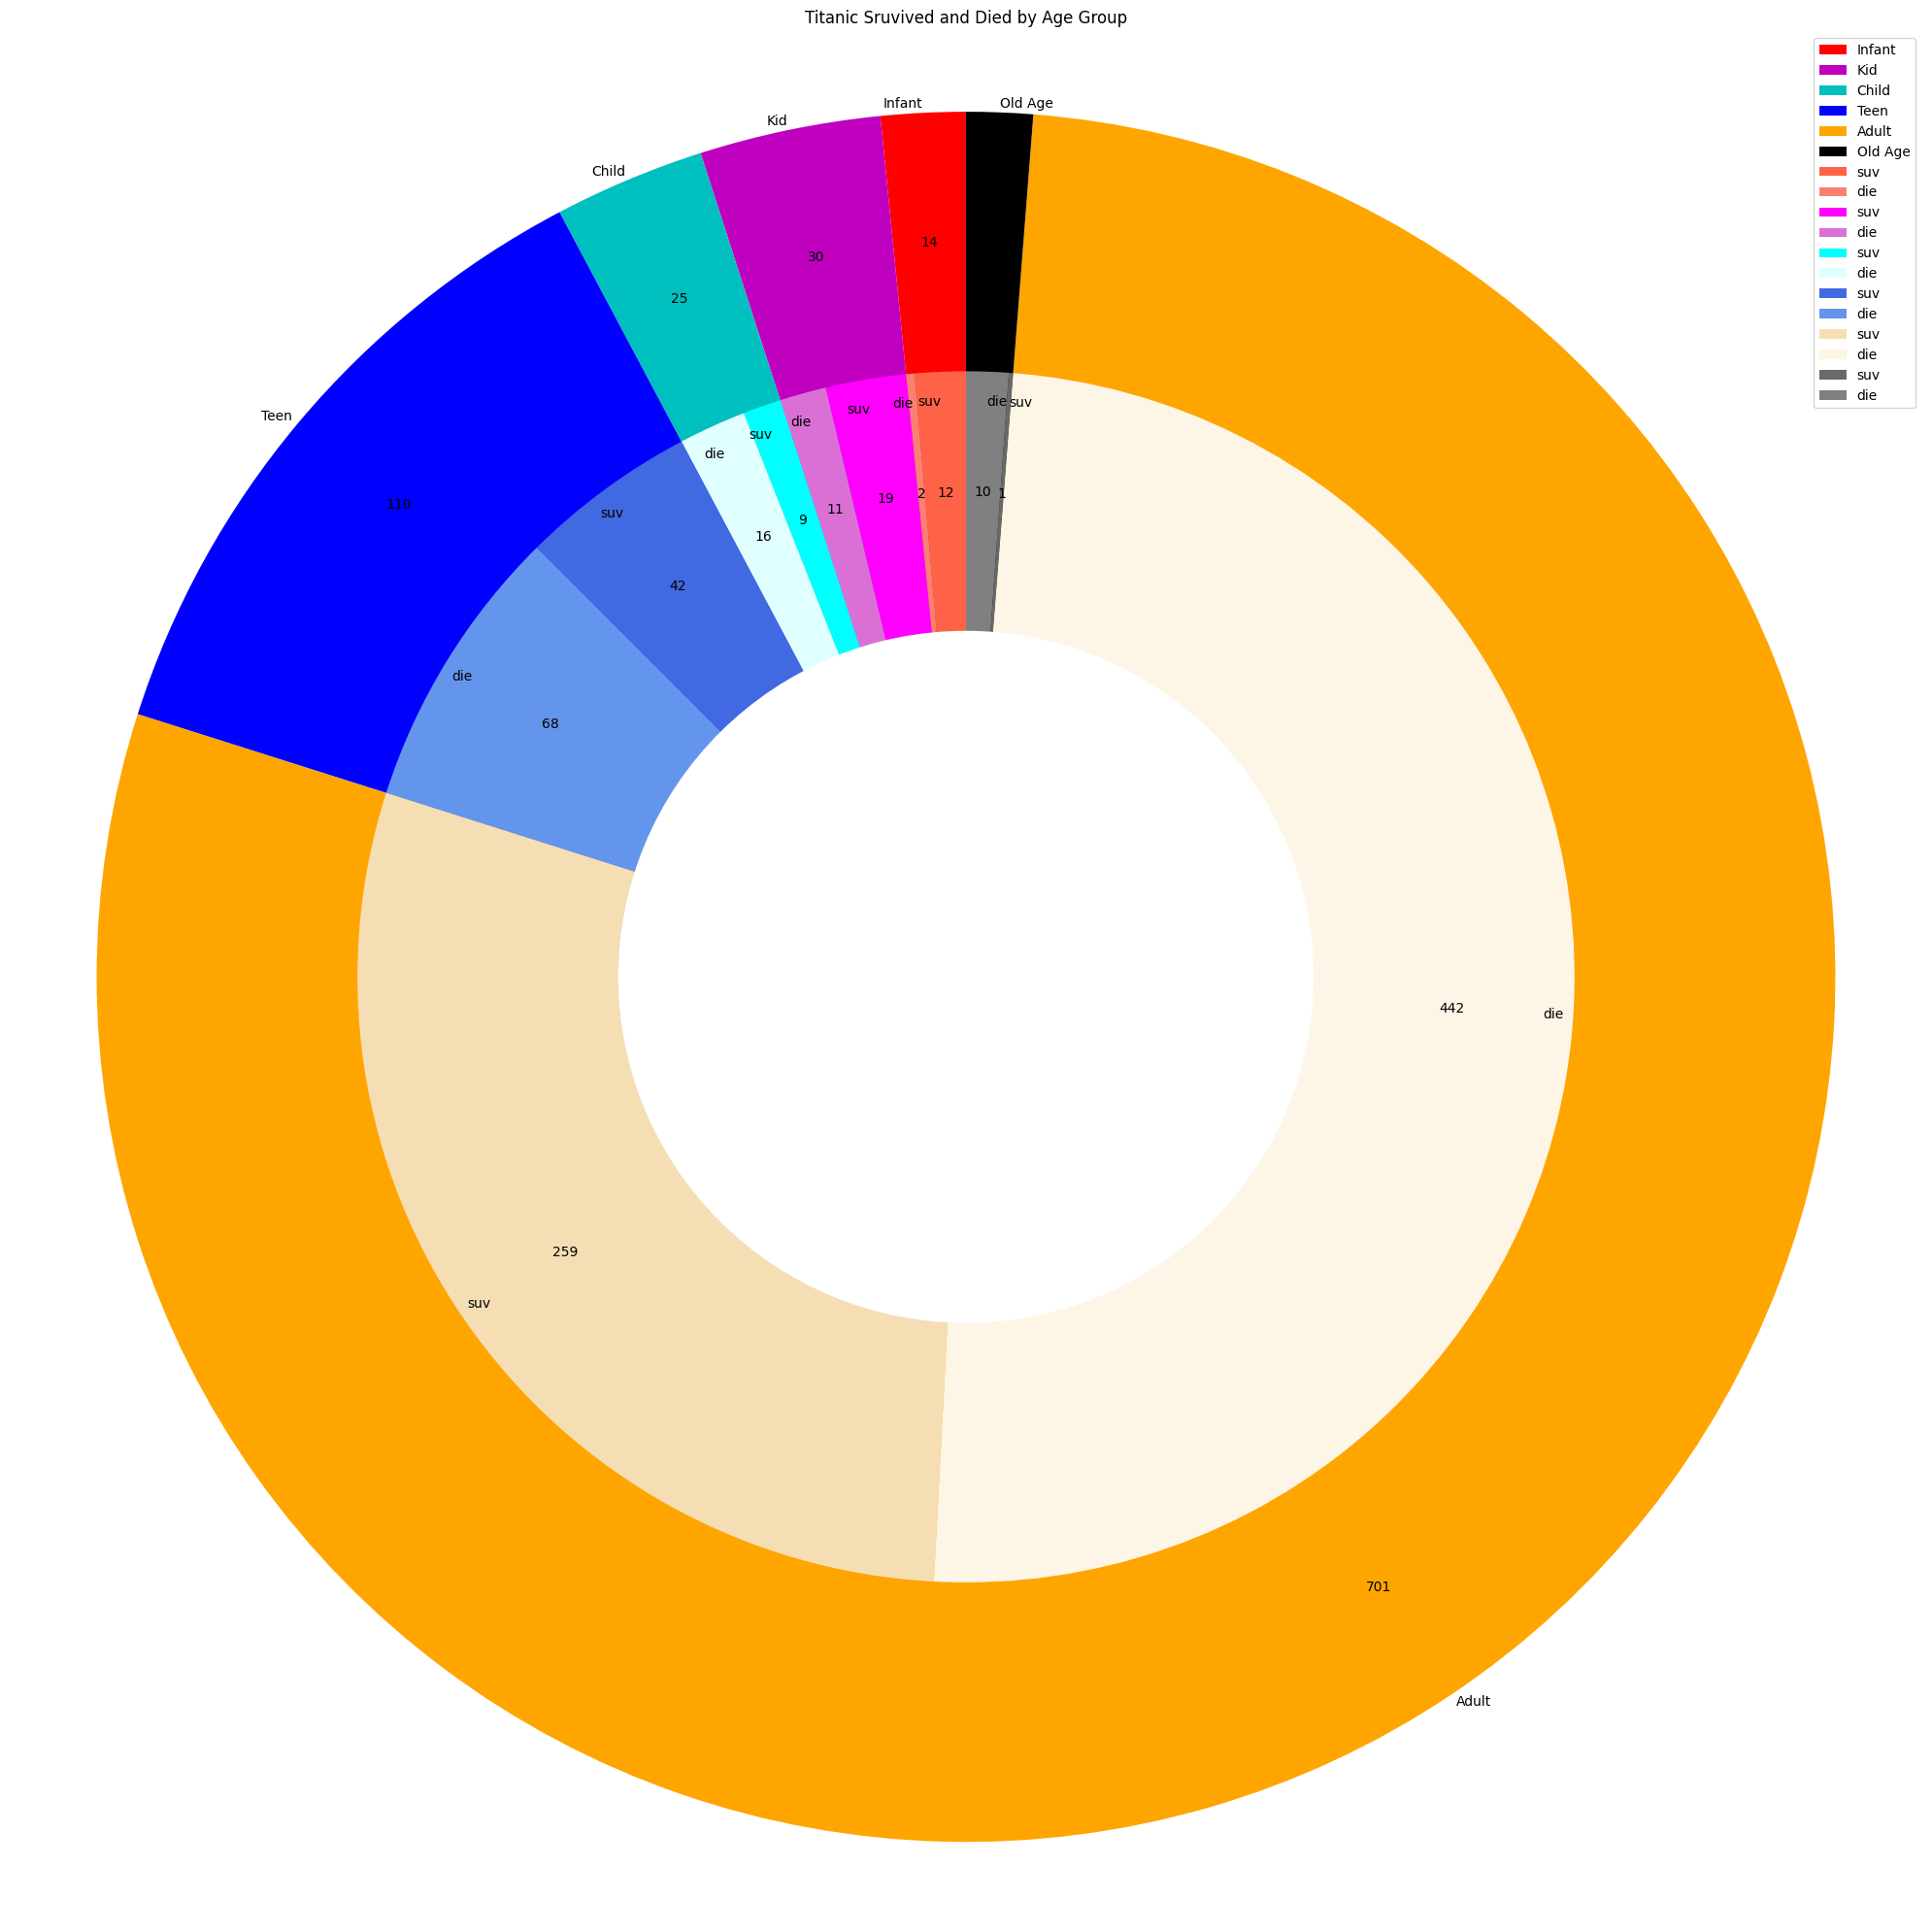

In [134]:
plt.figure(figsize=(20,20)) 
outer_data = [
    survived_age_group['infant']+ died_age_group['infant'], 
    survived_age_group['kid']+ died_age_group['kid'],   
    survived_age_group['child']+ died_age_group['child'],   
    survived_age_group['teen']+ died_age_group['teen'],  
    survived_age_group['adult']+ died_age_group['adult'],   
    survived_age_group['old_age']+ died_age_group['old_age']
        ]

inner_data = [survived_age_group['infant'], died_age_group['infant'], 
    survived_age_group['kid'], died_age_group['kid'],   
    survived_age_group['child'], died_age_group['child'],   
    survived_age_group['teen'], died_age_group['teen'],  
    survived_age_group['adult'], died_age_group['adult'],   
    survived_age_group['old_age'], died_age_group['old_age']]

outer_colors = ['r', 'm', 'c', 'b', 'orange', 'k']
inner_colors = ['tomato', 'salmon', 'fuchsia', 'orchid', 'aqua', 'lightcyan', 'royalblue', 'cornflowerblue', 'wheat', 'oldlace', 'dimgrey', 'grey']

inner_lables = ['suv', 'die', 'suv', 'die', 'suv', 'die', 'suv', 'die', 'suv', 'die', 'suv', 'die', ]


p0, tx0, autotexts0 = plt.pie(outer_data, labels=labels,labeldistance=1.01, colors=outer_colors, startangle=90, frame=True, autopct='%.0f%%', pctdistance =0.85)
pi, txi, autotextsi = plt.pie(inner_data, labels=inner_lables, colors=inner_colors, radius=0.7, startangle=90, labeldistance=0.95, autopct='%.0f%%', pctdistance =0.8)
centre_circle = plt.Circle((0, 0), 0.4, color="white", linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# outer donut text
for i, a in enumerate(autotexts0):
    a.set_text("{}".format(outer_data[i]))

# inner donut text
for i, a in enumerate(autotextsi):
    a.set_text("{}".format(inner_data[i]))

plt.title('Titanic Sruvived and Died by Age Group')
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

In [88]:
vals.sum(axis=1)

array([92., 77., 39.])

In [87]:
vals.flatten()

array([60., 32., 37., 40., 29., 10.])

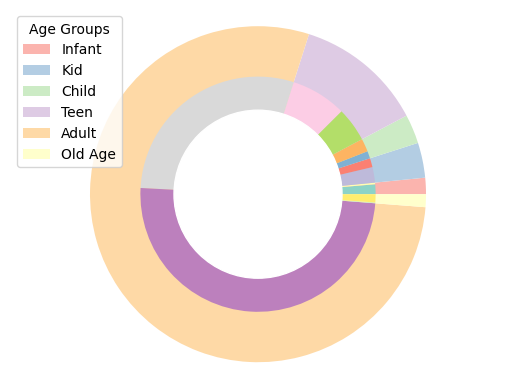

In [115]:
import matplotlib.pyplot as plt

# Data
outer_data = [
    survived_age_group['infant'] + died_age_group['infant'],
    survived_age_group['kid'] + died_age_group['kid'],
    survived_age_group['child'] + died_age_group['child'],
    survived_age_group['teen'] + died_age_group['teen'],
    survived_age_group['adult'] + died_age_group['adult'],
    survived_age_group['old_age'] + died_age_group['old_age']
]

inner_data = [
    survived_age_group['infant'], died_age_group['infant'],
    survived_age_group['kid'], died_age_group['kid'],
    survived_age_group['child'], died_age_group['child'],
    survived_age_group['teen'], died_age_group['teen'],
    survived_age_group['adult'], died_age_group['adult'],
    survived_age_group['old_age'], died_age_group['old_age']
]

# Color maps for the outer and inner donuts
outer_cmap = plt.get_cmap("Pastel1")  # Example color map for the outer donut
inner_cmap = plt.get_cmap("Set3")    # Example color map for the inner donut

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the outer donut
wedges_outer, _ = ax.pie(outer_data, radius=1, labels=None, colors=outer_cmap(range(len(outer_data))))
ax.pie(inner_data, radius=0.7, labels=None, colors=inner_cmap(range(len(inner_data))))

# Add a circle in the center for the inner donut
center_circle = plt.Circle((0, 0), 0.5, color='white')
fig.gca().add_artist(center_circle)

# Optional: Add labels
labels = ['Infant', 'Kid', 'Child', 'Teen', 'Adult', 'Old Age']
ax.legend(wedges_outer, labels, title="Age Groups", loc="upper left")

# Set aspect ratio to be equal so that the pie is drawn as a circle
ax.axis('equal')

# Show the plot
plt.show()


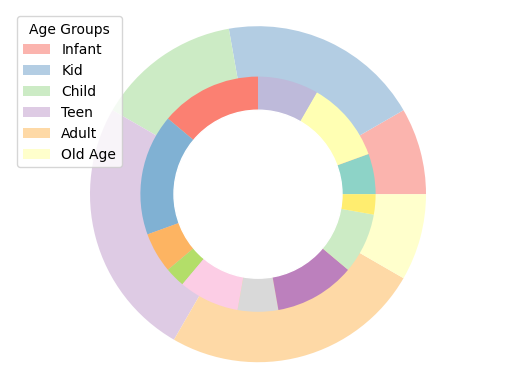

In [92]:
import matplotlib.pyplot as plt

# Data and values
age_groups = ['Infant', 'Kid', 'Child', 'Teen', 'Adult', 'Old Age']
survived = [10, 20, 15, 25, 30, 10]  # Example values for survived passengers
died = [5, 15, 10, 20, 15, 5]  # Example values for passengers who died

# Calculate total values for the outer and inner parts
outer_data = [sum(x) for x in zip(survived, died)]
inner_data = survived + died

# Color maps for the outer and inner donuts
outer_cmap = plt.get_cmap("Pastel1")  # Example color map for the outer donut
inner_cmap = plt.get_cmap("Set3")    # Example color map for the inner donut

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the outer donut
wedges_outer, _ = ax.pie(outer_data, radius=1, labels=None, colors=outer_cmap(range(len(outer_data))))
ax.pie(inner_data, radius=0.7, labels=None, colors=inner_cmap(range(len(inner_data))))

# Add a circle in the center for the inner donut
center_circle = plt.Circle((0, 0), 0.5, color='white')
fig.gca().add_artist(center_circle)

# Add labels
ax.legend(wedges_outer, age_groups, title="Age Groups", loc="upper left")

# Set aspect ratio to be equal so that the pie is drawn as a circle
ax.axis('equal')

# Show the plot
plt.show()


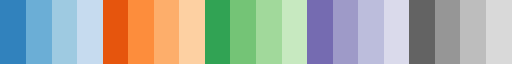

In [93]:
plt.colormaps["tab20c"]

In [94]:
plt.colormaps['tab20c']

TypeError: 'ListedColormap' object is not subscriptable